# Machine Learning Homework 1 (deadline: September 24th, 10:15)

#### Plagiarism disclaimer

We would like you to write all the algorithms by yourself, because it helps you to understand and remember them. However, you have an option to use some pieces of code from public external sources (e.g. Stack Overflow), but only with proper citation. In this case you can receive 80% max per each task where you used public external code. If you use but don't cite a piece of public external code then we consider it to be plagiarism. Use of external code that is not publicly available online is forbidden. 

NB! For visualization purposes (plotting) you may use any code you want, not much to understand there.

If you get caught with a clear case of plagiarism:

- If there are no previous problems depending on the situation you might get away with just getting 0 points for the task and get a warning from us. Note that the curriculum manager would also be informed.
- If the problem appears several times or we know that you have already warnings from other courses, the dean's office will be informed and this can lead to expelling.


## Task 0. 
### <font color='purple'>Use Python to print "Hello World! I will not plagiarize!". Here and in the following the ellipsis (...) stands for a place which needs to be replaced with your own code.</font>

In [2]:
# YOUR CODE STARTS
print("Hello World! I will not plagiarize!")
# YOUR CODE ENDS

Hello World! I will not plagiarize!


### <font color='purple'>Please make sure that you have all the following packages installed: </font>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') # Plot style

In [4]:
from numpy.random import multivariate_normal, seed
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Task 1. Basic linear classifier (1 point)

#### <font color='purple'>(a) Check the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) and define a `pandas` dataframe using the arrays given below. Please store your dataframe in the variable `data`. It should contain 3 columns and 12 rows. 

In [5]:
x1 = np.array([5, 6, 7, 7, 8, 9, 0, 1, 2, 4, 5, 6])
x2 = np.array([2, 1, 3, 5, 10, 3, 4, 8, 6, 10, 9, 11])
y = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1])

# YOUR CODE STARTS
data = pd.DataFrame(data = np.array([x1,x2,y]).transpose(), columns = ["x1", "x2", "y"])
# YOUR CODE ENDS

data.head() # this will show the first lines of the dataframe, helping us to check whether you got it right

,x1,x2,y
0,5,2,1
1,6,1,1
2,7,3,1
3,7,5,1
4,8,10,1


#### <font color='purple'>(b) Plot your data in axes `x1` and `x2`, highlight two classes with different colors, name the axes.

Feel free to use techniques from the notebook of the first practice session

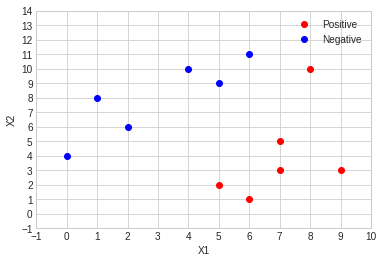

In [6]:
def plot_data(data):
    # Plot function goes here
    # We suggest to use plt.plot(...) for each class
    # YOUR CODE STARTS
    plt.plot(data.loc[data.y == 1, "x1"], data.loc[data.y == 1, "x2"], "ro", label = "Positive")
    plt.plot(data.loc[data.y == -1, "x1"], data.loc[data.y == -1, "x2"], "bo", label = "Negative")
    
    plt.legend(markerscale = 1)
    
    plt.xlim(-1,10)
    plt.ylim(-1,14)
    plt.xticks(list(range(-1,11)))
    plt.yticks(list(range(-1,15)))
    
    plt.xlabel("X1")
    plt.ylabel("X2")
    # YOUR CODE ENDS
    
plot_data(data)
plt.show()

#### <font color='purple'>(c) Find and highlight in the plot the center of mass for each of two classes as well as the middle point between these centers. </font>

Center of mass for class +1: (7.000000,4.000000)
Center of mass for class -1: (3.000000,8.000000)
Middle point between the two centers: (5.000000,6.000000)


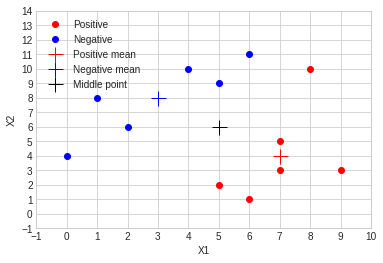

In [7]:
# Calculate values for pos_c1, pos_c2, neg_c1, neg_c2, m1, m2 which will all be printed below
# YOUR CODE STARTS
pos_c1 = data.loc[data.y == 1, "x1"].mean()
pos_c2 = data.loc[data.y == 1, "x2"].mean()
neg_c1 = data.loc[data.y == -1, "x1"].mean()
neg_c2 = data.loc[data.y == -1, "x2"].mean()
m1 = (pos_c1 + neg_c1)/2
m2 = (pos_c2 + neg_c2)/2

plot_data(data)
plt.plot(pos_c1, pos_c2, "r+", markersize = 15, label = "Positive mean")
plt.plot(neg_c1, neg_c2, "b+", markersize = 15, label = "Negative mean")
plt.plot(m1, m2, "k+", markersize = 15, label = "Middle point")
plt.legend(markerscale = 1)
#plt.plot([-1,10], [0,11], "k--")
# YOUR CODE ENDS

print("Center of mass for class +1: (%f,%f)" % (pos_c1,pos_c2))
print("Center of mass for class -1: (%f,%f)" % (neg_c1,neg_c2))
print("Middle point between the two centers: (%f,%f)" % (m1,m2))

#### <font color='purple'>(d) Find (or guess) the equation of the decision boundary line chosen by the basic linear classifier. For this you might need to use the positions of centers of mass and the middle point between them. Formula of a line through two points can help also:</font>

$\frac{x-x_1}{x_2-x_1} = \frac{y-y_1}{y_2-y_1}$

Answer: y=x+1

#### <font color='purple'>(e) Plot the data together with the decision boundary line chosen by the basic linear classifier. For this you can make use of the equation that you obtained in the previous subtask.</font>

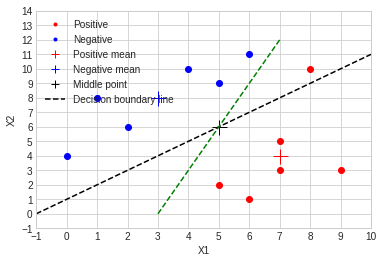

In [8]:
plot_data(data) # first plot the data points

# Write code to draw the line. Hint: you can use plt.plot(...) again 
# YOUR CODE STARTS
plt.plot(pos_c1, pos_c2, "r+", markersize = 15, label = "Positive mean")
plt.plot(neg_c1, neg_c2, "b+", markersize = 15, label = "Negative mean")
plt.plot(m1, m2, "k+", markersize = 15, label = "Middle point")
plt.plot([-1,10], [0,11], "k--", label = "Decision boundary line")
plt.legend(markerscale = 0.5, loc = 2)
plt.plot([3,7], [0,12], "g--")
# YOUR CODE ENDS

plt.show()

#### <font color='purple'>(f) Are there any misclassified instances? If yes, then please write their coordinates.</font>

Answer: Yes, a "Positive" value on coordinates (8,10), (X1,X2) respectively

#### <font color='purple'>(g) Are the classes linearly separable in the training data? If yes, then please report one line which separates the classes, by writing down its equation.</font>

Answer: Yes, such a line would be y=3x-9

#### <font color='purple'>(h) Did you get help in this task from public external code (yes/no). If yes, then please provide the link also.</font>

Answer: No

## Task 2. Perceptron (1 point)

#### <font color='purple'>(a) Implement the perceptron algorithm based on pseudocode from the first lecture: </font>

<img src="perceptron_algorithm.png" alt="perceptron_algorithm" style="width: 400px;"/>

<font color='purple'>**Note:** check `pandas` [manual about indexing data](https://pandas.pydata.org/pandas-docs/stable/indexing.html) and [iterrows documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html), it could be useful, you may want to refresh your memories about the [dot product](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) as well. Your final plot should be a picture similar to this:
<img src="perceptron_result.png" alt="perceptron_result" style="width: 300px;"/></font>

[1.0, 16, -10]


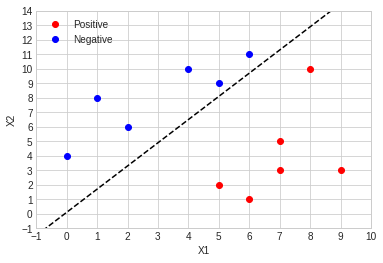

In [9]:
def perceptron(data, w=[0,0,0], learning_rate=1):
    # Write the code to train the perceptron, putting the final weights in variable `w` 
    # Optional challenge: Can you do it with less than 10 lines of code? (no extra points for this)
    # YOUR CODE STARTS
    converged = False
    while (converged == False):
        converged = True
        for i in range(len(data)):
            if (data.loc[i, "y"]*data.loc[i, ["x0","x1","x2"]].dot(w) <= 0):
                w[0], w[1], w[2] = w[0] + learning_rate * data.loc[i, "y"] * data.loc[i, "x0"], w[1] + learning_rate * data.loc[i, "y"] * data.loc[i, "x1"], w[2] + learning_rate * data.loc[i, "y"] * data.loc[i, "x2"]
                converged = False
    # YOUR CODE ENDS
    return w

data['x0'] = np.ones(len(data)) # Don't forget to create homogeneous coordinates!
data = data[['x0', 'x1', 'x2', 'y']]  # Make column reordering
w = perceptron(data)
plot_data(data)
# Finally plot the resulting decision boundary line
# YOUR CODE STARTS
print(w)
x = np.arange(-1,10,0.1)
y = (w[1] * x + w[0]) / w[2] * (-1)
plt.plot(x, y, "k--")
# YOUR CODE ENDS
plt.show()

#### <font color='purple'>(b) Did you get help from public external code (yes/no). If yes, then please provide the link also.</font>

Answer: No

## Task 3. Probability theory (1 point)

To solve the following exercises we recommend to read the first 5 chapters on Probability theory from MathWiki web-site: http://mathwiki.cs.ut.ee/probability_theory
(1. Event and probability; 2. Probability of two events; 3. Conditional probability; 4. Total probability and 5. Expected value). We also recommend that you solve all the exercises given in MathWiki site for training purposes.

<font color='red'>**When answering the following questions don't only write the answer, but also the way to the solution. Also express the answer as a probability (e.g. $P(accept=good)$) in addition to showing the value of the probability.**</font>

*The dataset below includes data about car evaluation (attribute "accept") based on six input attributes.*

<img src="minicars.png" alt="Dataset" style="width: 500px;"/>

#### <font color='purple'>(a) Given the data above, find the probability of a randomly selected car to be evaluated as “good”. Please explain how you got the answer.

Answer: $$P(accept=good) = \frac4{10} = 0.6$$ Explanation: Since there are a total of 10 possible choices, 4 of which are evaluated as "good". Since we are choosing randomly, this is a Bernoulli distribution with a chance of 0.4. A := Accept = "Good".

#### <font color='purple'>(b) If we evaluate 2 independently selected random cars (it could be the same car twice), what is the probability of both of them evaluated as “good”. Please explain how you got the answer.</font>

Answer: $$P(accept_1=good,accept_2=good) = \frac4{10}\cdot\frac4{10}=\frac{16}{100}=0.16$$
Alternatively: $$P(accept_1=good,accept_2=good) = C^2_{10}\cdot0.4^2\cdot0.6^8 = 45\cdot0.4^2\cdot0.6^8$$

Explanation: Since again we have a total of 10 possible outcomes for one selection, from which 4 are positive for us. Because we take two cars independently, randomly and by putting the first car back into the selection the probabilities for both of them are the same. Also because we want both of the probabilities to be true at the same time we need to multiply the probabilities. Similarly to the last exercise we know this is a Binomial distribution $Bin(0.4,2)$ and we are looking for $P(x = 2)$. Thus using the formula for calculating the binomial dsitribution probabilities we can find the answer.

#### <font color='purple'>(c) Find the probability that a randomly selected car is evaluated either “good” or very good (“vgood”). Please explain how you got the answer.

Answer: $$P(accept = good) + P(accept = vgood) = \frac4{10} + \frac2{10} = \frac6{10} = 0.6$$
Alternative notation: $$P(A) + P(B) = \frac4{10} + \frac2{10} = \frac6{10} = 0.6$$

Explanation: $$ A := accept = good \\ B := accept = vgood$$

We have a total of 10 possible outcomes for one selection, from which 4 are defined by $A$ and 2 are defined by $B$. Since we want at least one of them to happen at a time we need to add the two probabilities together to get the answer (both events are mutually exclusive).

#### <font color='purple'>(d) What is the probability of a randomly selected car to be evaluated as unacceptable (“unacc”) given that it can accommodate 2 persons. Please explain how you got the answer.</font>

Answer: $$ P(A|B) = \frac{P(A,B)}{P(B)} = \frac{\frac3{14}}{\frac3{14}} = 1$$

Explanation: $$ A := accept = unacc \\ B := persons = 2$$
Currently we have a total of 3 possible outcomes, since there are only 3 cars that can accommodate 2 persons, from which 3 are defined by $A$.

#### <font color='purple'>(e) Are the events `doors<4` and `accept=acc` independent? Please explain how you got the answer.</font>

Answer: $$ P(A,B) = P(A)\cdot P(B) \\
P(A) = \frac3{10} \\ P(B) = \frac4{10} \\ P(A,B) = \frac0{10}\\ 0 \neq \frac{12}{100} = \frac{3}{10} \cdot \frac{4}{10} $$

Explanation: $$A := doors < 4 \\ B := accept = acc$$
We have a total of 10 possible outcomes, from which 3 are described by $A$, 4 by $B$ and 0 by $A$ and $B$ simultaneously. Thus according to the rule of independence we can see that since the sides are not equal to each other, the events are not independent.

#### <font color='purple'>(f) Express the following probability using the Bayes' rule.</font>

Answer: $$P(accept=vgood\;|\; buying=med,\; maint=med) = ...$$
Answer using normal notation: $$ P(C\;|\;A,B) = \frac{P(A,B\;|\;C) \cdot P(C)}{P(A,B)} = \frac{\frac{1}{2}\cdot\frac{2}{10}}{\frac{1}{10}} = \frac{2 \cdot 10}{2 \cdot 10} = 1$$

Explanation: $$ A := buying = med \\ B := main = med \\ C := accept = vgood$$

##  Task 4. Naive Bayes (2 points)

In this exercise you will program your own Naive Bayes algorithm and compare it to sklearn's BernoulliNB implementation. We will use **car.csv** dataset for this.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

In [11]:
data = pd.read_csv("car.csv", dtype="category", header = None)
data.columns = ["buying", "maint", "doors", "persons", "lug-boot", "safety", "accept"]

In [12]:
print(data.shape)
data.head()

(1728, 7)


,buying,maint,doors,persons,lug-boot,safety,accept
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


#### <font color='purple'>(a) Use the train_test_split method to divide the data into 75% training and 25% testing data. Use parameter random_state = 0 to set the same random seed and ensure that we all get the same results.</font>

In [19]:
# YOUR CODE STARTS
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,["buying", "maint", "doors", "persons", "lug-boot", "safety"]], data.loc[:, "accept"], test_size = 0.25, random_state = 0)
# YOUR CODE ENDS

# This is for us to check that the resulting datasets have the correct shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1296, 6), (432, 6), (1296,), (432,))

#### <font color='purple'>(b) Now implement your own Naive Bayes method. We have prepared a class MyNaiveBayes where you can fill in the methods. Don't worry about the implementation speed at the moment, although, if you are experienced with Python you can try to come up with an implementation that would also be efficient. Feel free to add methods or change the existing ones, but make sure that the functions **fit** and **predict** will still be in the class with exactly the same signatures. They will be used below to test your implementation.</font>

In [14]:
class MyNaiveBayes:
    
    def fit(self, data, labels):
        # use this method to learn the model
        # if you feel it is easier to calculate priors and likelihoods at the same time
        # then feel free to change this method
        self.priors = self.calculate_priors(labels)
        self.likelihoods = self.calculate_likelihoods(data, labels)
        
    def predict(self, data):
        # YOUR CODE STARTS
        pred = []
        for index, row in data.iterrows():
            probs = {}
            for classifier in self.priors.keys():
                prob = 1
                for feature in data.columns:
                    prob = prob * self.likelihoods[classifier+"_"+feature+"_"+row[feature]]
                probs[classifier] = prob * self.priors[classifier]
            pred.append(max(probs, key = probs.get))
        return(pred)
            
        # YOUR CODE ENDS

    def calculate_priors(self, train_labels):
        # YOUR CODE STARTS
        dict = {}
        for i in y_train.unique():
            dict[i] = sum(y_train==i)/len(y_train)
        return dict
        # YOUR CODE ENDS

    def calculate_likelihoods(self, train_data, train_labels):
        # YOUR CODE STARTS
        dict = {}
        for classifier in train_labels.unique():
            class_data = train_data[train_labels == classifier]
            for feature in train_data.columns:
                for element in train_data[feature].unique():
                    dict[classifier+"_"+feature+"_"+element] = len(class_data[class_data[feature] == element]) / len(class_data)
        return dict
        # YOUR CODE ENDS

#### <font color='purple'>(c) Call out your method and calculate the train and test accuracies.</font>

In [15]:
%%timeit
my_nb = MyNaiveBayes()
my_nb.fit(X_train, y_train)
preds_train = my_nb.predict(X_train)
preds_test = my_nb.predict(X_test)
# YOUR CODE STARTS
train_accuracy = sum(preds_train == y_train)/len(y_train)
test_accuracy = sum(preds_test == y_test)/len(y_test)
# YOUR CODE ENDS
print("Train accuracy: ", train_accuracy)
print("Test accuracy: ", test_accuracy)

Train accuracy:  0.8742283950617284
Test accuracy:  0.8217592592592593
Train accuracy:  0.8742283950617284
Test accuracy:  0.8217592592592593
Train accuracy:  0.8742283950617284
Test accuracy:  0.8217592592592593
Train accuracy:  0.8742283950617284
Test accuracy:  0.8217592592592593
Train accuracy:  0.8742283950617284
Test accuracy:  0.8217592592592593
Train accuracy:  0.8742283950617284
Test accuracy:  0.8217592592592593
Train accuracy:  0.8742283950617284
Test accuracy:  0.8217592592592593
Train accuracy:  0.8742283950617284
Test accuracy:  0.8217592592592593
429 ms ± 14.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### <font color='purple'>(d) Use `BernoulliNB` of `sklearn` and calculate its train and test accuracies. Remember that you cannot feed in the dataset with categorical features to sklearn models. You have to do a transformation first (consult the tutorial if you don't remember).</font>

In [20]:
nb = BernoulliNB()
# YOUR CODE STARTS
print(X_train.columns)
X_train_dummies = pd.get_dummies(X_train, columns = X_train.columns)
X_test_dummies = pd.get_dummies(X_test, columns = X_test.columns)
nb.fit(X_train_dummies, y_train)
preds_train = nb.predict(X_train_dummies)
preds_test = nb.predict(X_test_dummies)
train_accuracy = sum(preds_train == y_train) / len(y_train)
test_accuracy = sum(preds_test == y_test) / len(y_test)
# YOUR CODE ENDS
print("Train accuracy: ", train_accuracy)
print("Test accuracy: ", test_accuracy)

Index(['buying', 'maint', 'doors', 'persons', 'lug-boot', 'safety'], dtype='object')
Train accuracy:  0.878858024691358
Test accuracy:  0.8379629629629629


#### <font color='purple'>(e) Accuracies achieved by your implementation and BernoulliNB can be slightly different. Try to read the description of `BernoulliNB` from `sklearn` documentation and try to guess what might be the reasons.</font>

Answer: Probably because the decision rule for BernoulliNB is slightly different from the one that I am using. This one uses the rule $$P(x_i\;|\;y) = P(i\;|\;y)x_i + (1 - P(i\;|\;y))(1-x_i)$$

## Task 5. Comparison of different supervised learning methods (1 point)

In this task you will compare the performance of `sklearn` implementations of studied methods ([perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html), [Naive Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html) and [KNN](http://scikit-learn.org/stable/modules/neighbors.html)) for different types of datasets (separable, overlapped, hammer).

Below you can find helper functions that we wrote for you and one example.

In [21]:
def make_gaussian_data(n_samples,pos_mean,pos_covariance_diag,neg_mean,neg_covariance_diag,random_state=0):
    seed(random_state)
    n_pos = round(n_samples/2)
    n_neg = n_samples - n_pos
    pos = multivariate_normal(pos_mean,np.array(pos_covariance_diag)*np.identity(2),n_pos)
    neg = multivariate_normal(neg_mean,np.array(neg_covariance_diag)*np.identity(2),n_neg)
    df_train = pd.DataFrame(pos).append(pd.DataFrame(neg))
    df_train.columns = ('x','y')
    df_train['c'] = n_pos*['pos'] + n_neg*['neg']
    df_train.c = df_train.c.astype('category')
    X_train = df_train.drop('c',axis=1)
    y_train = df_train.c
    return X_train,y_train

def make_gaussian_train_test(n_train,n_test,pos_mean,pos_covariance_diag,neg_mean,neg_covariance_diag,random_state=0):
    return make_gaussian_data(n_train,pos_mean,pos_covariance_diag,neg_mean,neg_covariance_diag,random_state=random_state) + \
        make_gaussian_data(n_test,pos_mean,pos_covariance_diag,neg_mean,neg_covariance_diag,random_state=random_state+1)

In [22]:
def make_round_blobs(n_train=100,n_test=1000,separation=2,random_state=0):
    return make_gaussian_train_test(n_train,n_test,(-separation/2.0,0),(1,1),(+separation/2.0,0),(1,1),random_state=random_state)
  
def make_hammer(n_train=100,n_test=1000,random_state=0):
    return make_gaussian_train_test(n_train,n_test,(+2,+2),(1,4),(-8,0),(20,1),random_state=random_state)

In [23]:
all_datasets = {
    'round_overlap': make_round_blobs(separation=2),
    'round_separable': make_round_blobs(separation=4),
    'hammer': make_hammer(random_state=2),
    'round_overlap_20': make_round_blobs(n_train=20,separation=2),
    'round_overlap_50': make_round_blobs(n_train=50,separation=2),
    'round_overlap_100': make_round_blobs(n_train=100,separation=2),
    'round_overlap_200': make_round_blobs(n_train=200,separation=2),
    'round_overlap_500': make_round_blobs(n_train=500,separation=2),
    'round_overlap_1000': make_round_blobs(n_train=1000,separation=2),
}

In [24]:
all_classifiers = {
    'most_frequent_class': DummyClassifier(strategy='most_frequent'),
    'uniform_random': DummyClassifier(strategy='uniform',random_state=0),
    'knn1': KNeighborsClassifier(n_neighbors=1),
    'knn3': KNeighborsClassifier(n_neighbors=3),
    'knn5': KNeighborsClassifier(n_neighbors=5),
    'knn7': KNeighborsClassifier(n_neighbors=7),
    'knn9': KNeighborsClassifier(n_neighbors=9),
    'knn25': KNeighborsClassifier(n_neighbors=25),
    'knn75': KNeighborsClassifier(n_neighbors=75),
    'naive_bayes': GaussianNB(),
    'perceptron': Perceptron()
}

In [25]:
def create_grid(X_train):
    x = np.arange(min(X_train.x),max(X_train.x), (max(X_train.x)-min(X_train.x))/100 )
    y = np.arange(min(X_train.y),max(X_train.y), (max(X_train.y)-min(X_train.y))/100 )
    xx, yy = np.meshgrid(x, y)
    X_grid = pd.DataFrame({'x':xx.flatten(),'y':yy.flatten()})
    return X_grid

def plot_model(ax,X_train,y_train,X_grid,model):
    y_pred = model.predict(X_grid)
    X_grid[y_pred=='pos'].plot(x='x',y='y',kind='scatter',s=20,color='red',ax=ax)
    X_grid[y_pred=='neg'].plot(x='x',y='y',kind='scatter',s=20,color='blue',ax=ax)
    X_train[y_train=='pos'].plot(x='x',y='y',kind='scatter',s=40,color='pink',ax=ax)
    X_train[y_train=='neg'].plot(x='x',y='y',kind='scatter',s=40,color='lightblue',ax=ax);
    
def plot_models_datasets(model_names,dataset_names,datasets_in_rows=False,plot_width=5,plot_height=5):
    n_row = len(model_names)
    n_col = len(dataset_names)
    if datasets_in_rows: # if datasets should be in rows not columns then swap the rows and columns
        n_row,n_col = n_col,n_row 
    fig, axes = plt.subplots(n_row,n_col,figsize=(n_col*plot_width,n_row*plot_height))
    for row in range(n_row):
        for col in range(n_col):
            if datasets_in_rows: # depending on whether datasets should be in rows or columns
                dataset_name = dataset_names[row]
                model_name = model_names[col]
            else:
                dataset_name = dataset_names[col]
                model_name = model_names[row]
            X_train,y_train,X_test,y_test = all_datasets[dataset_name]
            X_grid = create_grid(X_test) # create the grid of instances to show decision regions
            model = all_classifiers[model_name].fit(X_train,y_train)
            y_pred = model.predict(X_test)
            accuracy = sum(y_pred==y_test)/len(y_test)
            if (n_row==1) and (n_col==1): # support for plots with only 1 plot
                ax = axes
            elif n_col==1: # support for plots with only 1 column
                ax = axes[row]
            elif n_row==1: # support for plots with only 1 row
                ax = axes[col]
            else:
                ax = axes[row,col]
            ax.set_aspect(aspect='equal') # make sure the x and y scales have equal aspect
            ax.set_title(dataset_name+' : ' + model_name + ' : test_acc=' + str(accuracy))
            plot_model(ax,X_train,y_train,X_grid,model);
    plt.show()

Have a look at the code defining all_datasets and all_classifiers. These are the datasets and classifiers that you will analyze in the following tasks. To answer the following questions you can plot the decision boundaries of classifiers on these datasets as follows:

TypeError: object of type 'CategoricalDtype' has no len()

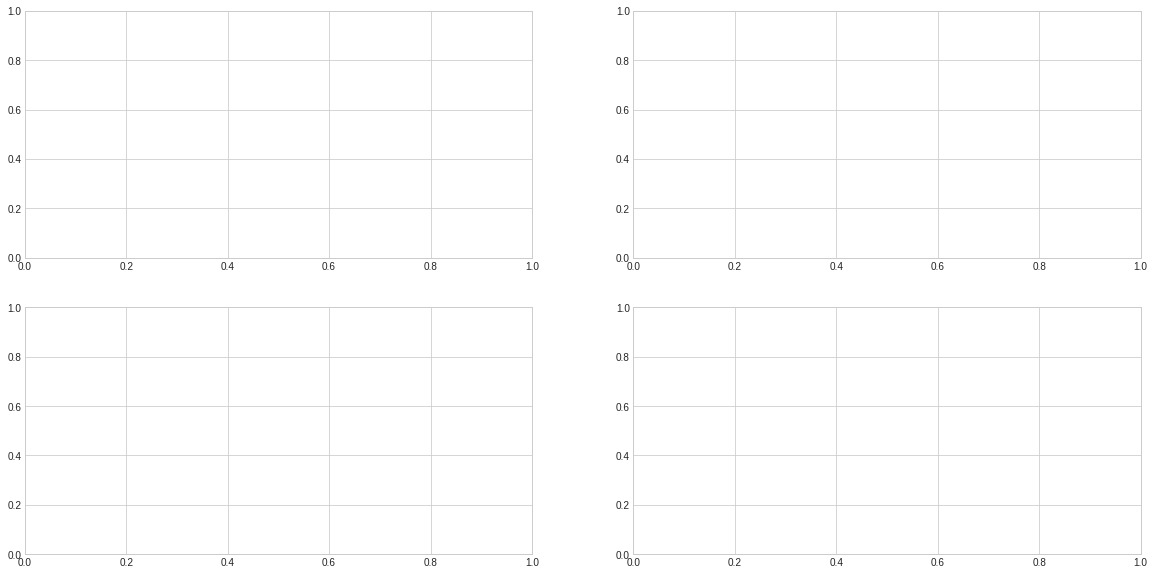

In [26]:
plot_models_datasets(model_names=['knn1','knn3'], 
                     dataset_names=['round_overlap','round_separable'],
                     datasets_in_rows=True, plot_width=10, plot_height=5)

The function plot_models_datasets takes a list of classifier names, a list of datasets, a boolean stating whether you want to have datasets in rows or columns, and two numbers stating the width and height of one plot. Note that the sizes are rescaled automatically to make sure that aspect ratio is preserved.

The circles on these plots represent training data points (positives shown in pink and negatives in light blue). Accuracy on test data is given in the caption of each plot but the test data are not shown. The background colours indicate the decision regions of the classifier. The red background corresponds to the region where the classifier predicts positive, and blue where it predicts negative.

The datasets round_overlap, round_separable and hammer all have 100 training instances with 50 in both classes. In datasets round_overlap_20, ..., round_overlap_1000 the number indicates the size of the training set. 

### K-nearest neighbours

Study the behaviour and accuracy of KNN across different values of K and different datasets.
#### <font color='purple'>(a) On which of the datasets round_overlap, round_separable and hammer is K=1 performing good or bad (compared to other values of K)? Explain why (in 1 paragraph).</font>

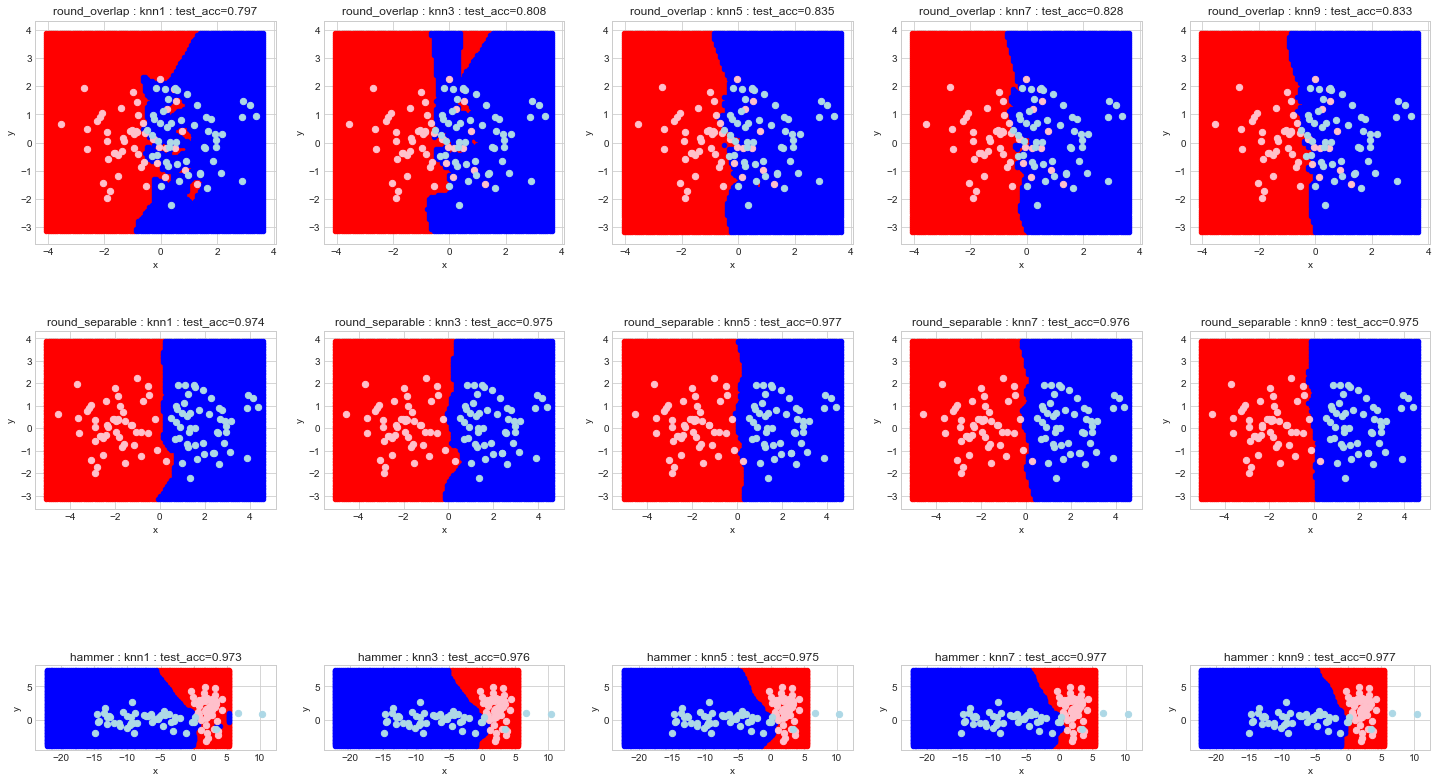

In [22]:
# YOUR CODE STARTS
plot_models_datasets(model_names=["knn1", "knn3", "knn5", "knn7", "knn9"],
                    dataset_names=["round_overlap","round_separable","hammer"],
                    datasets_in_rows = True)
# YOUR CODE ENDS

Answer: KNN1 works worse on the "round_overlap" dataset due to its high volatility. Since positive and negative points are mixed with each other it cannot predict very well. Higher N values already predict from clusters and dont take into account very extreme values, which is the downside of N=1. On other datasets it's as good as the others, due to the data already being mostly seperate.

#### <font color='purple'>(b) On which of the datasets round_overlap, round_separable and hammer is K=75 performing good or bad (compared to other values of K)? Explain why (in 1 paragraph).</font>

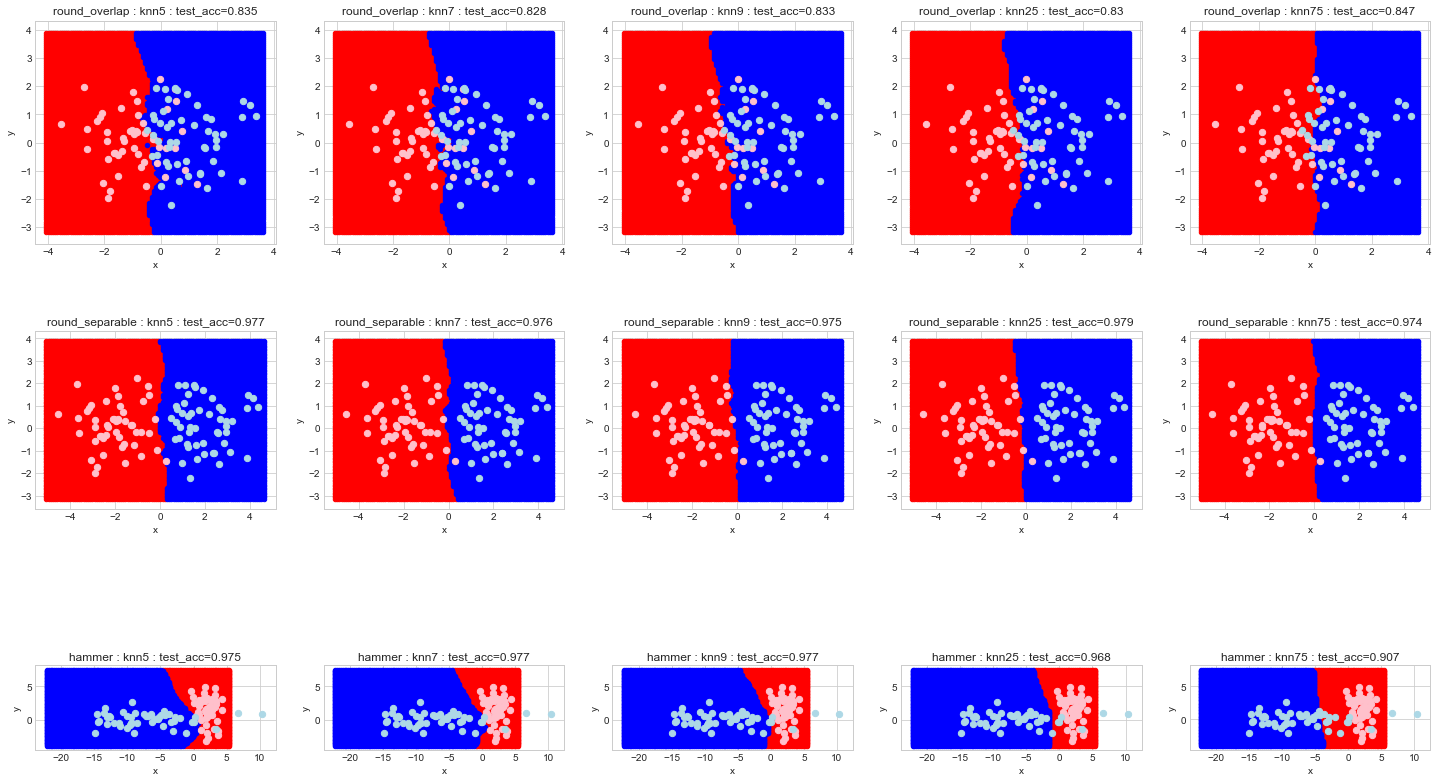

In [23]:
# YOUR CODE STARTS
plot_models_datasets(model_names=["knn5", "knn7", "knn9", "knn25", "knn75"],
                    dataset_names=["round_overlap","round_separable","hammer"],
                    datasets_in_rows = True)
# YOUR CODE ENDS

Answer: It works better on "round_overlap" dataset because it doesn't include the extreme values as much. It looks at big clusters and predicts based on them, which is better for overlapping data. On "round_seperable" it is as good as the other ones, due to the data being easily seperable and classifiable. On "hammer" it is worse than others, due to negative values being too spread out. Since positives are a big cluster and negatives are spread out on an axis, it doesnt classify them properly anymore.

#### <font color='purple'>(c) What are the best-performing values of K for datasets round_overlap, round_separable and hammer? Explain why (in 1 paragraph).</font>

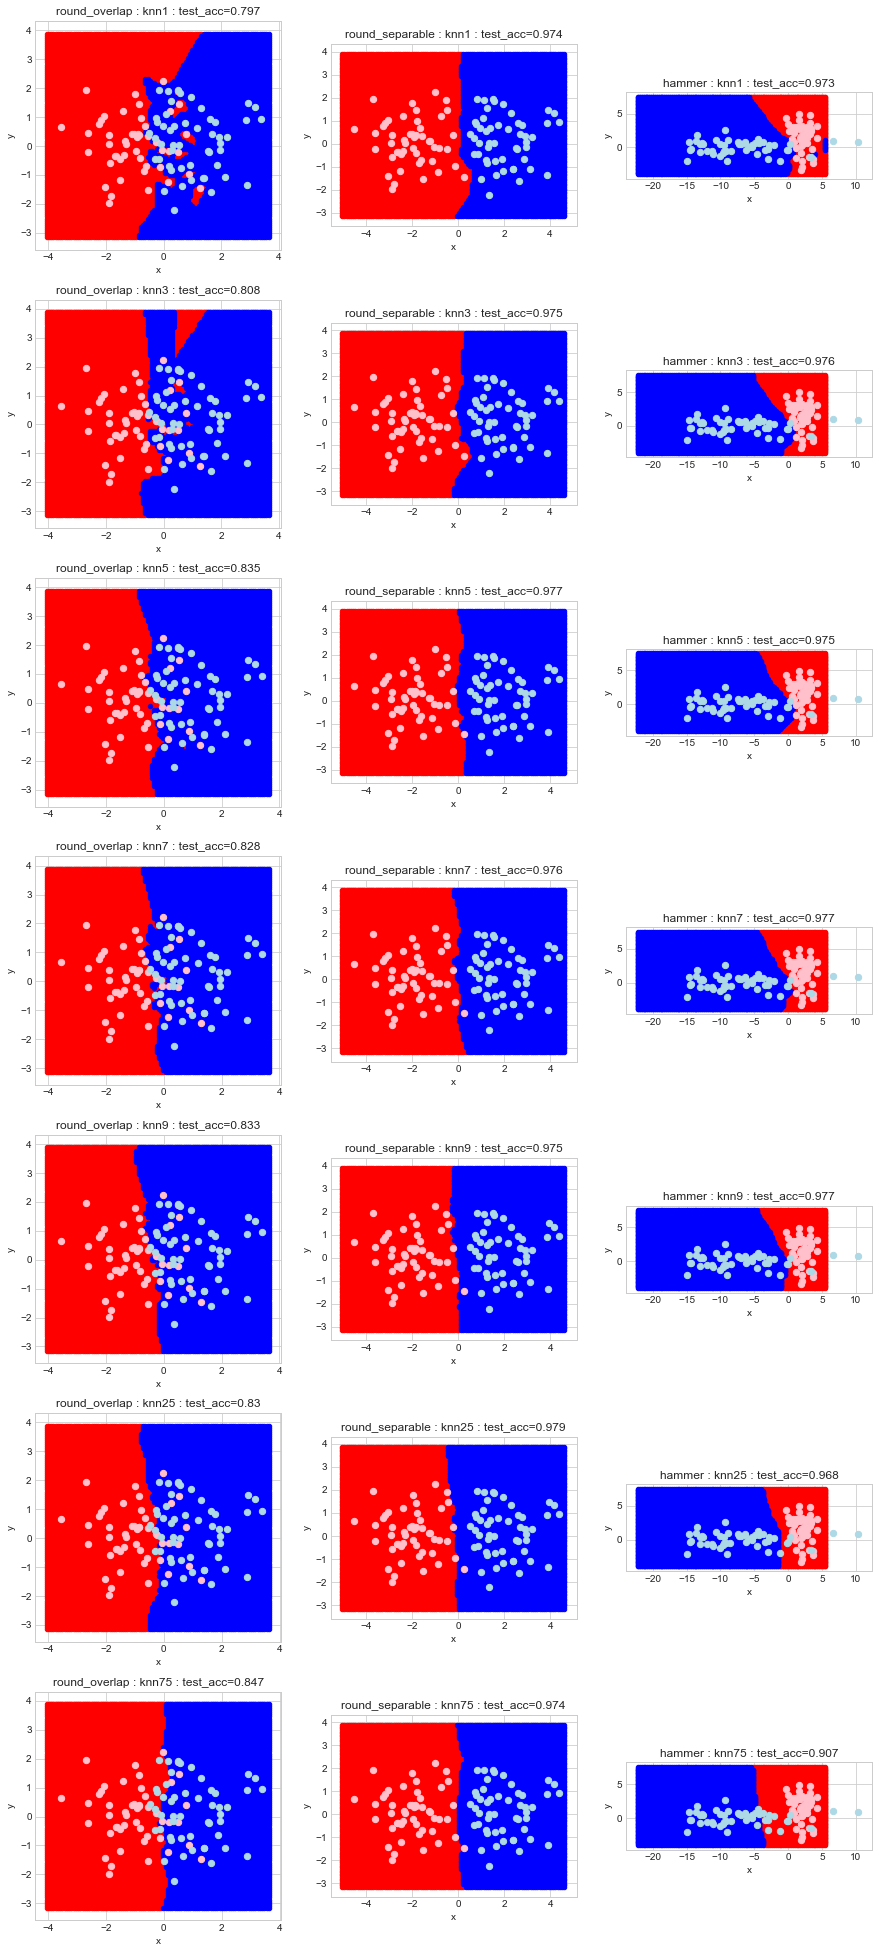

In [24]:
# YOUR CODE STARTS
plot_models_datasets(model_names=["knn1", "knn3", "knn5", "knn7", "knn9", "knn25", "knn75"],
                    dataset_names=["round_overlap","round_separable","hammer"],
                    datasets_in_rows = False)
# YOUR CODE ENDS

Answer: For "round_overlap" it is KNN75, due to it being to objectively classify the data, because it looks for clusters and leaves out the more extreme values that both positives and negatives have. For "round_seperable" all of the N values are good, because the data is already seperated and both classifiers have the same ammount of values. I wouldn't say any of the N values is better. For "Hammer" the best N values are 3 and 5, due to the data being quite seperate already. Since the negatives are spread out and positives being clustered together, higher N values tend to start mis-classifing faster.

#### <font color='purple'>(d) How does KNN performance change when changing the size of the training set? Study this on the datasets *round_overlap_20, _50, _100, _200, _500, _1000* and with K=3, K=9. Explain why (in 1 paragraph).</font>

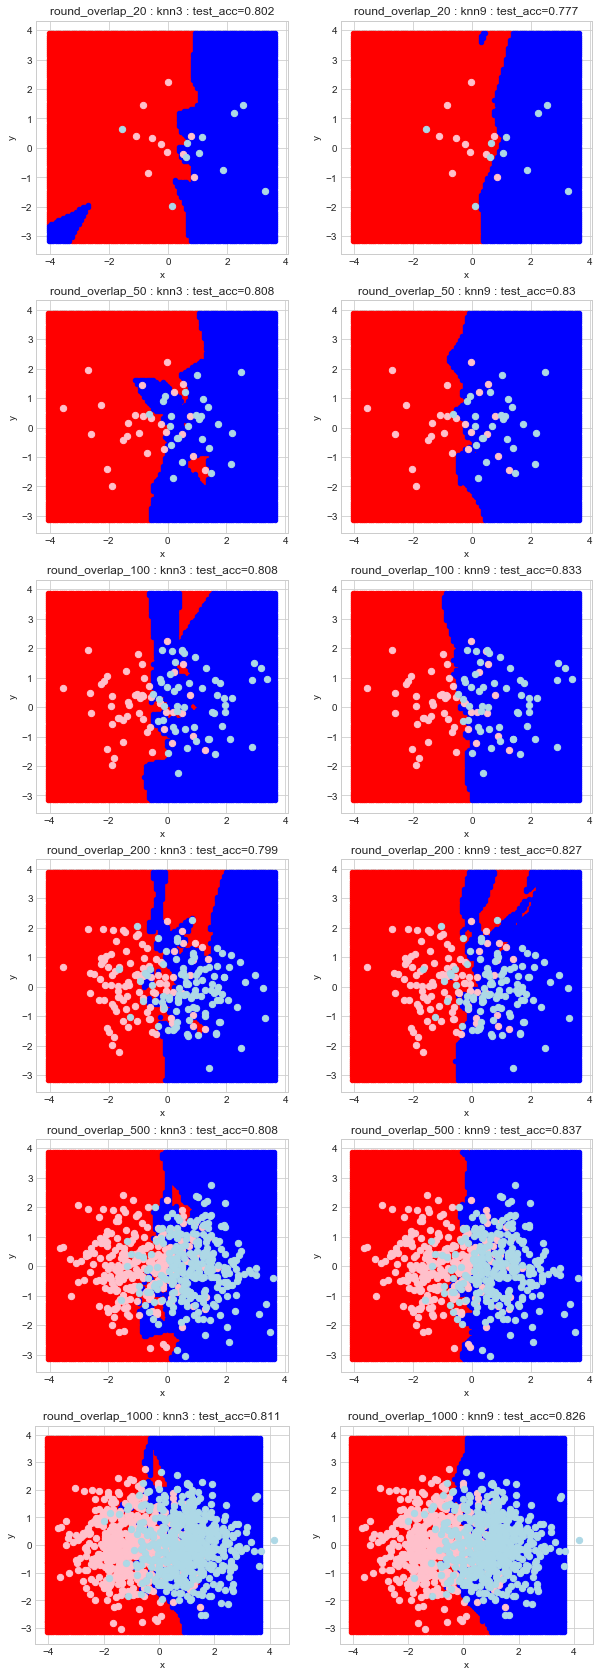

In [25]:
# YOUR CODE STARTS
plot_models_datasets(model_names=["knn3", "knn9"],
                    dataset_names = ["round_overlap_20", "round_overlap_50", "round_overlap_100", "round_overlap_200", "round_overlap_500", "round_overlap_1000"],
                    datasets_in_rows = True)
# YOUR CODE ENDS

Answer: For the lower N value (3), increasing the size of the dataset does not improve the accuracy very much since it is influenced by extreme points more than the higher N value. For the higher N value (9), increasing the size from 20 to 50 improves the accuracy more, since it makes it easier to indentify clusters. Increasing it further than that does not improve the accuracy that much more, since identifying clusters with only 9 neighbours gets harder, due to the volatility of the data.

### Comparison of many methods

Study the performance of various methods and come up with instructions for yourself on how you would choose the first learning algorithm to try on a future dataset (before running any code).
#### <font color='purple'>(e) Compare the performance of Naive Bayes against Perceptron. On which datasets (round_overlap, round_separable and hammer) does Naive Bayes perform better, worse, comparably to Perceptron? Explain why (in 1 paragraph).</font>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


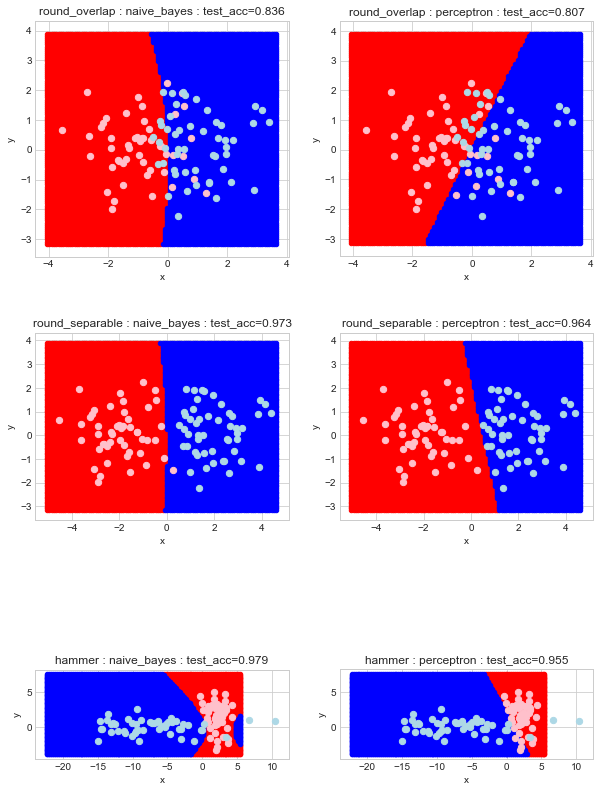

In [26]:
# YOUR CODE STARTS
plot_models_datasets(model_names=["naive_bayes","perceptron"],
                    dataset_names = ["round_overlap", "round_separable", "hammer"],
                    datasets_in_rows = True)
# YOUR CODE ENDS

Answer: Naive Bayes works better on "round_overlap" and "hammer" and is comparable on "round_separable". Since Naive Bayes tries to also cluster the data, it can handle overlapping data better. Preceptron is a linear seperator, so on "round_seperable" it can work well. But on "hammer" and "round_overlap" it is hard to linearly seperate the data, so it does not do a good job on those datasets.

#### <font color='purple'>(f) Compare the performance of Naive Bayes against KNN. On which datasets (round_overlap, round_separable and hammer) does Naive Bayes perform better, worse, comparably to Perceptron (Should be KNN)? Explain why (in 1 paragraph). </font>

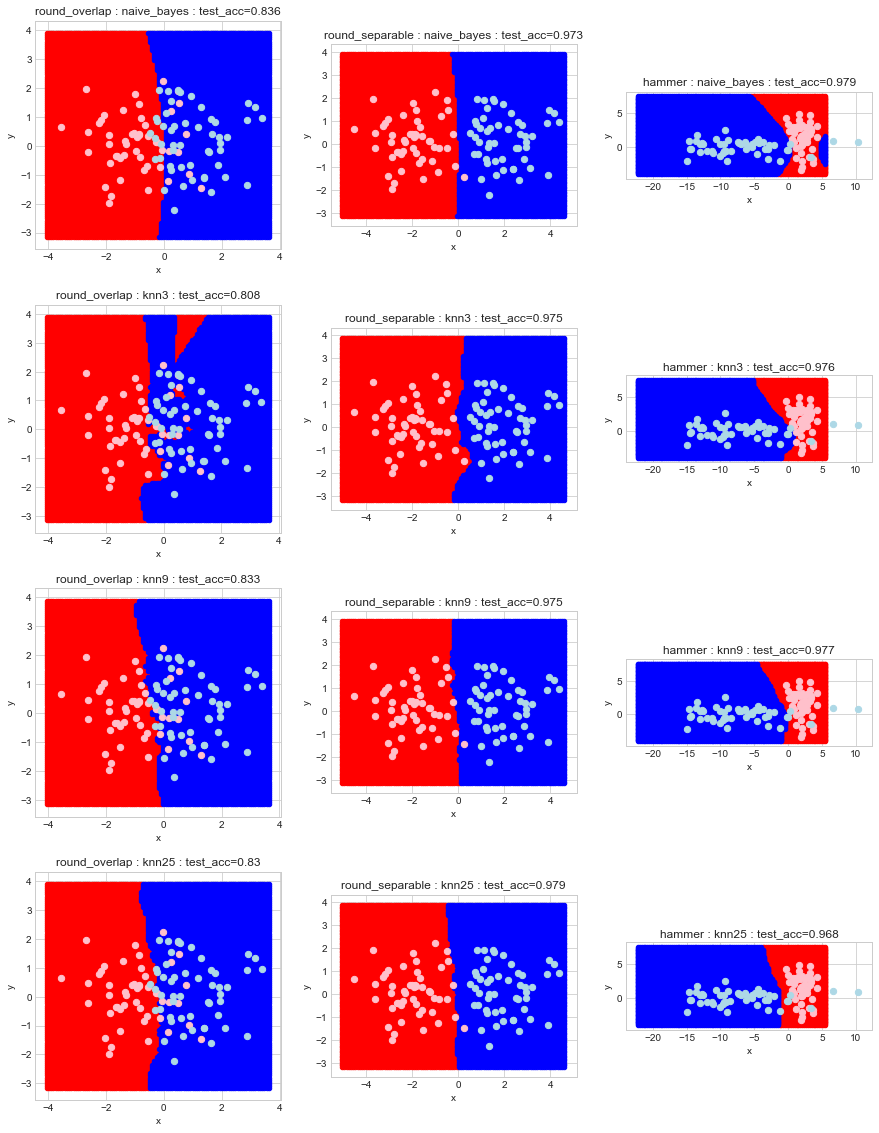

In [27]:
# YOUR CODE STARTS
plot_models_datasets(model_names = ["naive_bayes", "knn3", "knn9", "knn25"],
                    dataset_names = ["round_overlap", "round_separable", "hammer"],
                    datasets_in_rows = False)
# YOUR CODE ENDS

Answer: Naive Bayes is comparable to lower N valued models on the "round_separable" and "hammer" datasets and to higher N valued models on the "round_overlap" dataset. It is better than high N valued models on the "round_separable" and "hammer" datasets and lower N valued models on the "round_overlap" dataset. This is due to Naive Bayes being able to classify clusters well on datasets, that different N valued models might be have a hard time classifying.